<a href="https://colab.research.google.com/github/srahul101082/Capstone_ImageProcessing/blob/master/TensorFlow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)


2.3.0


In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
n=100
X=np.linspace(0,50,n)
y=np.linspace(0,50,n)

X+=np.random.uniform(-10,10,n)
y+=np.random.uniform(-10,10,n)

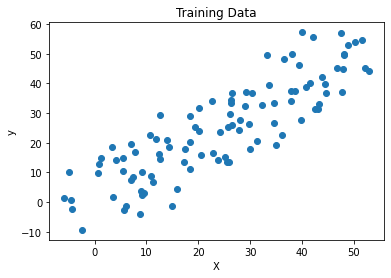

In [17]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training Data')
plt.show()

In [45]:
class LinearModel:
    def __init__(self):
        # y_pred = W*X + b
        self.W = tf.Variable(13.0)
        self.b = tf.Variable(4.0)
    
    def loss(self, y, y_pred):
        return tf.reduce_mean(tf.square(y - y_pred))
    
    def train(self, X, y, lr=0.0001, epochs=20, verbose=True):
        def train_step():
            with tf.GradientTape() as t:
                current_loss = self.loss(y, self.predict(X))

            dW, db = t.gradient(current_loss, [self.W, self.b])
            self.W.assign_sub(lr * dW) # W -= lr * dW
            self.b.assign_sub(lr * db)
            
            return current_loss
        
        for epoch in range(epochs):
            current_loss = train_step()
            if verbose:
                print(f'Epoch {epoch}: Loss: {current_loss.numpy()}') # <3 eager execution
                
    def predict(self, X):
        return self.W * X + self.b

Epoch 0: Loss: 124765.109375
Epoch 1: Loss: 86082.9765625
Epoch 2: Loss: 59400.33984375
Epoch 3: Loss: 40994.8515625
Epoch 4: Loss: 28298.88671875
Epoch 5: Loss: 19541.3046875
Epoch 6: Loss: 13500.388671875
Epoch 7: Loss: 9333.412109375
Epoch 8: Loss: 6459.06103515625
Epoch 9: Loss: 4476.35595703125
Epoch 10: Loss: 3108.700927734375
Epoch 11: Loss: 2165.302978515625
Epoch 12: Loss: 1514.5535888671875
Epoch 13: Loss: 1065.671875
Epoch 14: Loss: 756.0365600585938
Epoch 15: Loss: 542.452392578125
Epoch 16: Loss: 395.1237487792969
Epoch 17: Loss: 293.4975280761719
Epoch 18: Loss: 223.3964080810547
Epoch 19: Loss: 175.0412139892578
Epoch 20: Loss: 141.6861572265625
Epoch 21: Loss: 118.67814636230469
Epoch 22: Loss: 102.80734252929688
Epoch 23: Loss: 91.85980224609375
Epoch 24: Loss: 84.3082504272461
Epoch 25: Loss: 79.0992660522461
Epoch 26: Loss: 75.50613403320312
Epoch 27: Loss: 73.02762603759766
Epoch 28: Loss: 71.31796264648438
Epoch 29: Loss: 70.13866424560547
Epoch 30: Loss: 69.325172

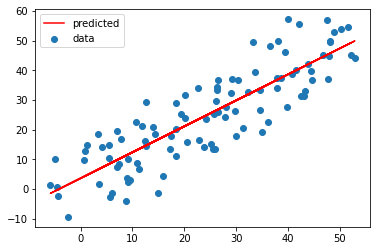

In [46]:
model = LinearModel()
model.train(X,y, epochs=50)
plt.scatter(X, y, label='data')
plt.plot(X, model.predict(X),'r-',label='predicted')
plt.legend()